In [57]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# for the addional queries
%matplotlib inline
from matplotlib import style
style.use('bmh')
import matplotlib.pyplot as plt

In [58]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [60]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()

In [61]:
#  3. Convert the June temperatures to a list.
junetemps = list((june))

In [62]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(junetemps,columns=['date','June Temps'])
june_df.set_index(june_df['date'], inplace=True)

In [63]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [64]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()

In [65]:
# 7. Convert the December temperatures to a list.
dectemp = list((december))

In [66]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dectemp,columns=['date','December Temps'])
dec_df.set_index(dec_df['date'], inplace=True)

In [67]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(0.0, 400.0)

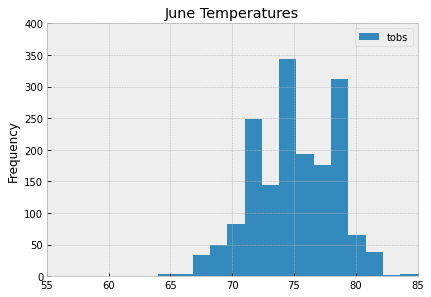

In [68]:
june_temp_df = pd.DataFrame(june_temp, columns=['tobs'])
june_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([55, 85])
plt.ylim([0,400])
# Average around 75

(0.0, 400.0)

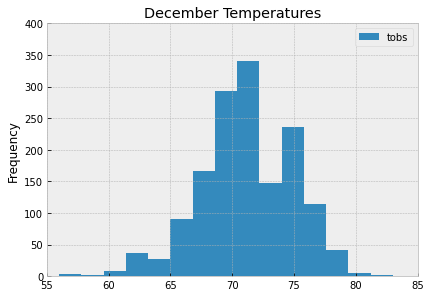

In [69]:
dec_temp_df = pd.DataFrame(dec_temp, columns=['tobs'])
dec_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([55,85])
plt.ylim([0,400])
# Average around 71


In [70]:
juneprcptemp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()
junePT=list((juneprcptemp))
juneprcptemp_df = pd.DataFrame(junePT,columns=['date','June Precip','June Temps'])
juneprcptemp_df.set_index(juneprcptemp_df['date'],inplace=True)
juneprcptemp_df.describe()

,June Precip,June Temps
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [71]:
decprcptemp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()
decPT=list((decprcptemp))
decprcptemp_df = pd.DataFrame(decPT,columns=['date','December Precip','December Temps'])
decprcptemp_df.set_index(decprcptemp_df['date'],inplace=True)
decprcptemp_df.describe()

,December Precip,December Temps
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [72]:
marprcptemp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==3).all()
marPT=list((marprcptemp))
marprcptemp_df = pd.DataFrame(marPT,columns=['date','March Precip','March Temps'])
marprcptemp_df.set_index(marprcptemp_df['date'],inplace=True)
marprcptemp_df.describe()

,March Precip,March Temps
count,1566.000000,1693.000000
mean,0.204227,70.059067
std,0.570625,3.845271
min,0.000000,56.000000
25%,0.000000,68.000000
50%,0.010000,70.000000
75%,0.120000,73.000000
max,6.380000,82.000000


In [73]:
seprcptemp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==9).all()
sePT=list((seprcptemp))
seprcptemp_df = pd.DataFrame(sePT,columns=['date','September Precip','September Temps'])
seprcptemp_df.set_index(seprcptemp_df['date'],inplace=True)
seprcptemp_df.describe()

,September Precip,September Temps
count,1379.000000,1480.000000
mean,0.164249,76.164865
std,0.437928,3.535178
min,0.000000,64.000000
25%,0.000000,74.000000
50%,0.020000,76.000000
75%,0.150000,79.000000
max,6.830000,87.000000
